# Based on the room type-one has to find the prices in different neighbourhood_group

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.basemap import basemap
path1=os.getcwd()

In [2]:
path=path1+'/file/Train.csv'
data=pd.read_csv(path)
print(data.shape)
data.dropna(inplace=True)
print(data.shape)

(34226, 16)
(27230, 16)


# Find the unique type of rooms

In [3]:
data['room_type'].unique()
data['last_review']=data['last_review'].astype('datetime64[ns]')
data['month_of_review']=pd.DatetimeIndex(data['last_review']).month
data['year_of_review']=pd.DatetimeIndex(data['last_review']).year
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,9,2015
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,7,2019
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,5,2019
5,9944426,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,2016-03-18,0.02,1,362,3,2016
6,19786915,Spacious Clean Studio Apartment,86892032,Marian,Queens,Rosedale,40.65766,-73.72838,Entire home/apt,60,1,57,2019-07-08,2.41,1,336,7,2019


# dataframes containing only Private room, Entire home/apt and Shared room

In [4]:
pr=data.loc[data['room_type']=='Private room']
home=data.loc[data['room_type']=='Entire home/apt']
Sr=data.loc[data['room_type']=='Shared room']

In [5]:
data.shape

(27230, 18)

In [6]:
pr.shape

(12335, 18)

In [7]:
home.shape

(14302, 18)

In [8]:
Sr.shape

(593, 18)

# checking unique neighbourhood_group

In [9]:
pr['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# description of price based on the grouping by neighbourhood.

In [10]:
pr.groupby(pr['neighbourhood_group']).price.describe()
home.groupby(home['neighbourhood_group']).price.describe()
Sr.groupby(Sr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,32.0,62.093750,137.180916,20.0,27.50,28.0,46.00,800.0
Brooklyn,192.0,45.385417,39.959631,0.0,29.75,35.0,45.00,400.0
Manhattan,257.0,77.914397,64.985338,25.0,49.00,68.0,80.00,800.0
Queens,110.0,69.054545,203.490271,19.0,30.00,37.0,47.25,1800.0
Staten Island,2.0,81.500000,96.873629,13.0,47.25,81.5,115.75,150.0


# Data variation
    - Lot of outliers are present in the prices 
    - Mean is greater than median 
    - we can remove the outliers from the data and implement the regression to predict the prices

In [11]:
pr.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,9,2015
11,20817201,Private Room in Trendy Williamsburg Loft,643120,Sam,Brooklyn,Williamsburg,40.71591,-73.95513,Private room,50,4,56,2019-06-20,2.53,4,8,6,2019
14,5040218,LUX Blg-Prime Area! Lg PRIVATE RM & BATH w/VIEWS!,26019828,Sonia,Manhattan,Hell's Kitchen,40.76159,-73.99824,Private room,69,2,22,2019-03-20,0.64,2,7,3,2019
20,17224372,Friendly Room 20-202,115993835,Shimin,Brooklyn,Sunset Park,40.63992,-74.00760,Private room,28,1,31,2019-03-10,1.08,5,1,3,2019
21,27312987,Bright and spacious room in Bushwick,89589630,Yaw,Brooklyn,Bushwick,40.69629,-73.91351,Private room,50,1,86,2019-06-30,7.70,1,198,6,2019


# Now plot the average price of the individual room type in different neighbourhood_groups
Since the difference of median and mean prices for each category was large so the average prices are influenced mainly due to outliers

Text(0, 0.5, 'Price ($/night)')

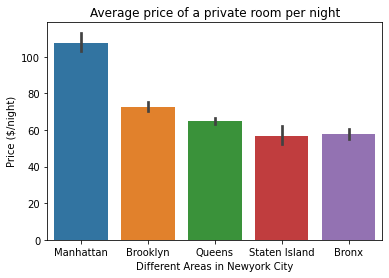

In [12]:
sns.barplot(pr['neighbourhood_group'],pr['price'])
plt.title('Average price of a private room per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

# Box plot for each room_type and different neighbourhood

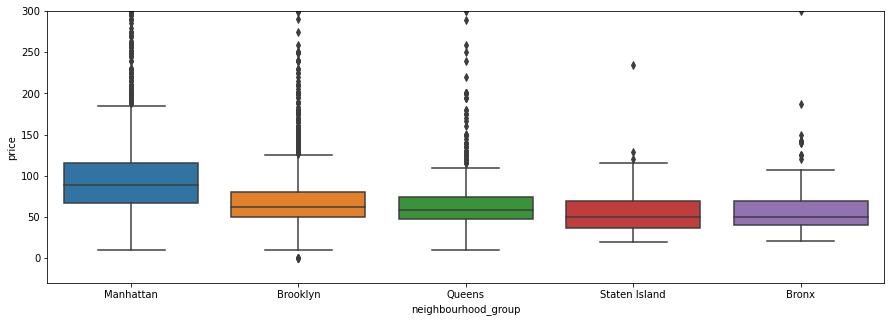

In [13]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(-30,300)
sns.boxplot(x='neighbourhood_group',y='price',data=pr)
plt
plt.show()


In [14]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
pr.groupby(pr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,366.0,57.718579,26.846597,21.0,40.0,50.0,69.75,300.0
Brooklyn,5569.0,72.633507,88.481942,0.0,50.0,62.0,80.00,5000.0
Manhattan,4424.0,107.345389,172.887453,10.0,67.0,89.0,115.00,9999.0
Queens,1861.0,64.827512,37.891055,10.0,47.0,59.0,74.00,700.0
Staten Island,115.0,56.660870,28.202242,20.0,37.0,50.0,69.00,235.0


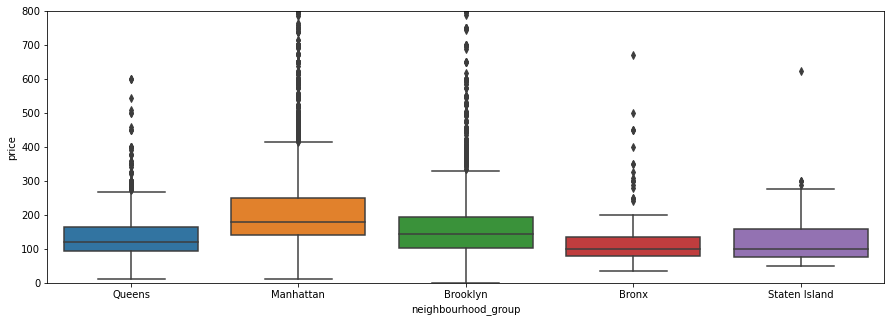

In [15]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 500 
plt.ylim(0,800)
sns.boxplot(x='neighbourhood_group',y='price',data=home)
plt
plt.show()

In [16]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
home.groupby(home['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,220.0,122.668182,84.617020,35.0,78.50,100.0,136.0,670.0
Brooklyn,5751.0,174.022779,229.109428,0.0,104.00,143.0,195.0,10000.0
Manhattan,6990.0,228.023176,230.481683,10.0,140.00,180.0,250.0,8500.0
Queens,1242.0,141.752013,105.505191,10.0,93.25,120.0,165.0,2600.0
Staten Island,99.0,131.606061,82.065034,49.0,76.50,100.0,157.5,625.0


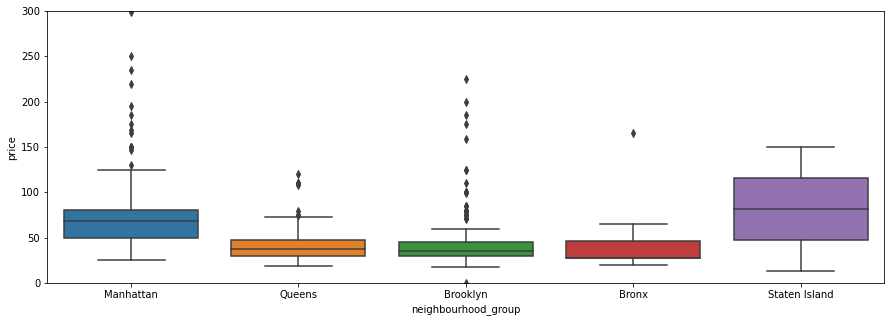

In [17]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(0,300)
sns.boxplot(x='neighbourhood_group',y='price',data=Sr)
plt
plt.show()

In [18]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
Sr.groupby(Sr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,32.0,62.093750,137.180916,20.0,27.50,28.0,46.00,800.0
Brooklyn,192.0,45.385417,39.959631,0.0,29.75,35.0,45.00,400.0
Manhattan,257.0,77.914397,64.985338,25.0,49.00,68.0,80.00,800.0
Queens,110.0,69.054545,203.490271,19.0,30.00,37.0,47.25,1800.0
Staten Island,2.0,81.500000,96.873629,13.0,47.25,81.5,115.75,150.0


# we have seen zero price properties in the brooklyn neighbourhood only so those properties can also be removed

In [19]:
var_position=Sr[['price']].idxmax()

#pr.columns

Sr.head()
#va=pr['name'][var_position]
#pr['name'][var_position]
#pr.head(20)
df=Sr[Sr.price == Sr.price.max()]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
29906,11234747,Mins away to Manhattan Suite Residence,24146326,Julien,Queens,Astoria,40.76626,-73.93054,Shared room,1800,3,5,2017-04-09,0.13,2,90,4,2017


# Similar plots for Entire home

Text(0, 0.5, 'Price ($/night)')

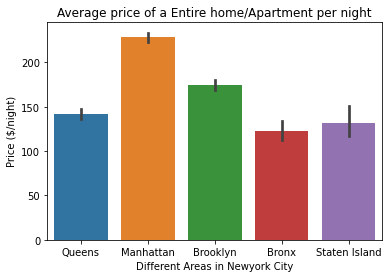

In [20]:
sns.barplot(home['neighbourhood_group'],home['price'])
plt.title('Average price of a Entire home/Apartment per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

Text(0, 0.5, 'Price ($/night)')

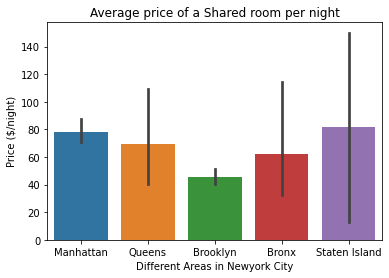

In [21]:
sns.barplot(Sr['neighbourhood_group'],Sr['price'])
plt.title('Average price of a Shared room per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

In [22]:
s1=Sr.loc[Sr['neighbourhood_group']=='Manhattan']
s1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
count,2.570000e+02,2.570000e+02,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,2.123712e+07,1.055291e+08,40.770126,-73.972151,77.914397,3.579767,28.214008,1.779961,3.747082,153.754864,6.182879,2018.389105
std,1.091786e+07,9.718132e+07,0.034801,0.020954,64.985338,10.117014,40.480379,1.734454,4.502846,144.767885,2.245138,1.184354
min,1.204800e+04,7.549000e+03,40.704570,-74.007420,25.000000,1.000000,1.000000,0.020000,1.000000,0.000000,1.000000,2014.000000
25%,1.154465e+07,1.707822e+07,40.745670,-73.988600,49.000000,1.000000,3.000000,0.380000,1.000000,9.000000,5.000000,2018.000000
50%,2.318442e+07,5.102584e+07,40.765380,-73.981210,68.000000,1.000000,12.000000,1.310000,2.000000,90.000000,6.000000,2019.000000
75%,3.110314e+07,1.971902e+08,40.790820,-73.952260,80.000000,2.000000,37.000000,2.700000,5.000000,322.000000,6.000000,2019.000000
max,3.614080e+07,2.713936e+08,40.867610,-73.920860,800.000000,100.000000,229.000000,9.120000,28.000000,365.000000,12.000000,2019.000000


In [23]:
p1=data.groupby([data['room_type'],data['neighbourhood_group']])

In [24]:
p1.mean()

id       host_id   latitude  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                2.131994e+07  9.921020e+07  40.848664   
                Brooklyn             1.656620e+07  4.708295e+07  40.684727   
                Manhattan            1.729733e+07  6.102011e+07  40.759207   
                Queens               2.043765e+07  8.475571e+07  40.728712   
                Staten Island        2.074362e+07  9.790092e+07  40.605285   
Private room    Bronx                2.084805e+07  1.015284e+08  40.848823   
                Brooklyn             1.837242e+07  6.010678e+07  40.685064   
                Manhattan            1.793473e+07  6.366808e+07  40.776695   
                Queens               2.090545e+07  9.813563e+07  40.732819   
                Staten Island        2.070556e+07  9.156027e+07  40.615736   
Shared room     Bronx                2.587535e+07  9.304908e+07  40.838412   
                Brooklyn             2.220952e+07  9.772755e+07  40.665140   
                Manhattan            2.123712e+07  1.055291e+08  40.770126   
                Queens               2.474413e+07  1.073204e+08  40.736078   
                Staten Island        3.189003e+07  1.044677e+08  40.623655   

                                     longitude       price  minimum_nights  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx               -73.877387  122.668182        5.059091   
                Brooklyn            -73.955239  174.022779        5.903843   
                Manhattan           -73.977694  228.023176        8.623891   
                Queens              -73.872804  141.752013        3.987118   
                Staten Island       -74.111811  131.606061        4.262626   
Private room    Bronx               -73.884344   57.718579        2.956284   
                Brooklyn            -73.946525   72.633507        4.722751   
                Manhattan           -73.967950  107.345389        4.369575   
                Queens              -73.869837   64.827512        3.970446   
                Staten Island       -74.101314   56.660870        3.086957   
Shared room     Bronx               -73.895251   62.093750        2.250000   
                Brooklyn            -73.948991   45.385417        5.817708   
                Manhattan           -73.972151   77.914397        3.579767   
                Queens              -73.874913   69.054545        4.227273   
                Staten Island       -74.105470   81.500000        1.500000   

                                     number_of_reviews  reviews_per_month  \
room_type       neighbourhood_group                                         
Entire home/apt Bronx                        42.027273           2.362000   
                Brooklyn                     32.576769           1.321384   
                Manhattan                    23.765951           1.154775   
                Queens                       34.293076           1.979026   
                Staten Island                37.050505           1.966061   
Private room    Bronx                        31.106557           1.635956   
                Brooklyn                     27.018675           1.252157   
                Manhattan                    33.546564           1.451673   
                Queens                       34.344438           1.934643   
                Staten Island                37.069565           1.712870   
Shared room     Bronx                        10.468750           1.245937   
                Brooklyn                     18.578125           1.090885   
                Manhattan                    28.214008           1.779961   
                Queens                       14.954545           1.440636   
                Staten Island                 5.500000           2.865000   

                                     calculated_host_listings_count  \
room_type   

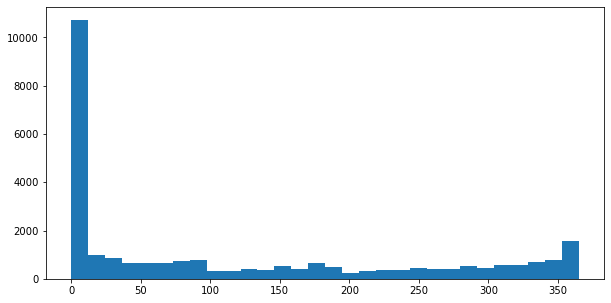

In [25]:
plt.figure(figsize=(10,5))
plt.hist(data['availability_365'],bins=30)
plt.show()

# Finding most popular properties

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'month_of_review', 'year_of_review'],
      dtype='object')
(22918, 18) (2802, 18) (3282, 18)


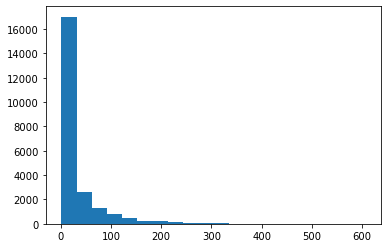

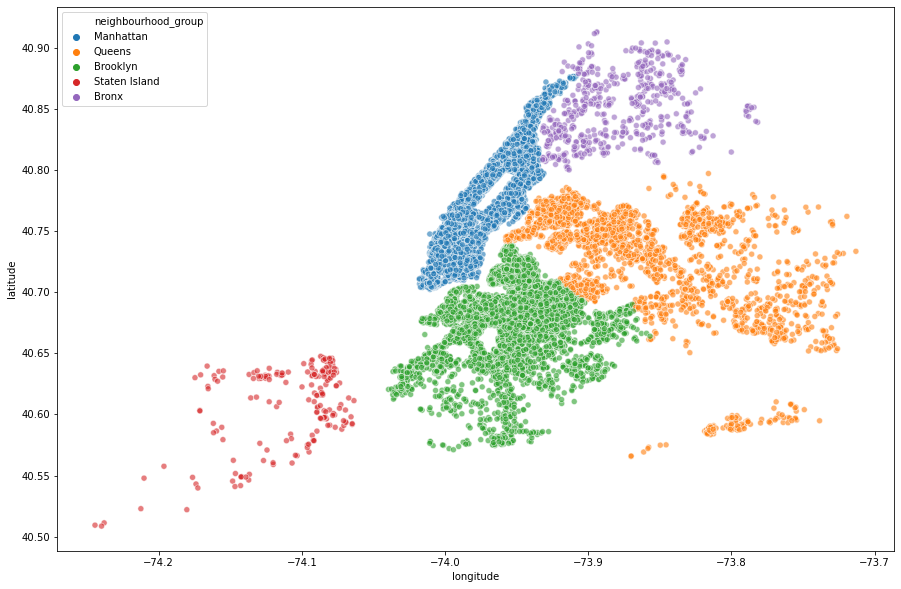

In [26]:

MP=data[data['availability_365']<=300]
print(MP.columns)
plt.hist(MP['number_of_reviews'],bins=20)

plt.figure(figsize=(15,10))
#plt.ylim(-74.2,-73.5)
#sns.scatterplot(MP['latitude'],MP['longitude'])

MP1=data[(data['availability_365'] > 50)&(data['availability_365']<=100)]
#sns.scatterplot(MP1['latitude'],MP1['longitude'],color=".5", marker="+")

MP2=data[(data['availability_365'] > 200)&(data['availability_365']<=300)]
#sns.scatterplot(MP2['latitude'],MP2['longitude'], marker="*")

Man=data[data['neighbourhood_group']=='Manhattan']


Bro=data[data['neighbourhood_group']=='Brooklyn']
#sns.scatterplot(Bro['latitude'],Bro['longitude'], marker="+")

Bnx=data[data['neighbourhood_group']=='Bronx']
#sns.scatterplot(Bro['latitude'],Bro['longitude'], marker="-")

sns.scatterplot(y=data['latitude'],x=data['longitude'],hue=data['neighbourhood_group'],alpha=0.6)
#sns.scatterplot(Man['latitude'],Man['longitude'], hue=data['room_type'])
#sns.scatterplot(MP2['latitude'],MP2['longitude'], color='0.5',marker="+")

print(MP.shape,MP1.shape,MP2.shape)

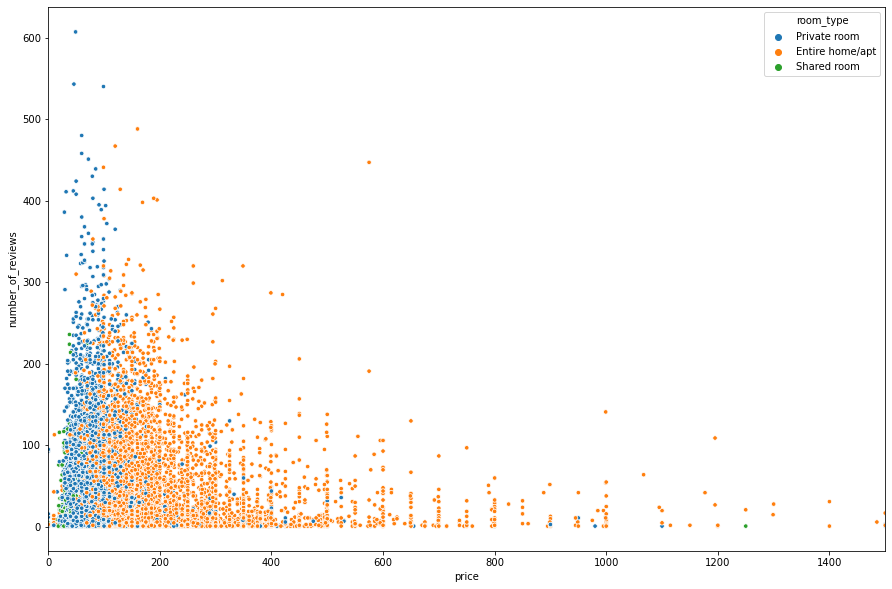

In [27]:
plt.figure(figsize=(15,10))
plt.xlim(0,1500)

sns.scatterplot(y=MP['number_of_reviews'],x=MP['price'],hue=MP['room_type'],s=20)

In [28]:
p1=MP.groupby([MP['room_type'],MP['neighbourhood_group']]).price.describe()
p1
#plt.figure(figsize=(10,5))
#p1.boxplot()
#plt.show()

count        mean         std   min  \
room_type       neighbourhood_group                                         
Entire home/apt Bronx                 160.0  108.368750   67.552414  35.0   
                Brooklyn             5127.0  165.959430  196.865686   0.0   
                Manhattan            6004.0  218.398235  200.691518  10.0   
                Queens               1002.0  133.903194   72.417355  10.0   
                Staten Island          72.0  126.166667   66.791878  49.0   
Private room    Bronx                 254.0   56.838583   29.220058  21.0   
                Brooklyn             4641.0   70.206206   57.687079   0.0   
                Manhattan            3815.0  101.699869  174.736912  10.0   
                Queens               1394.0   63.713773   39.471370  10.0   
                Staten Island          64.0   58.984375   33.035091  20.0   
Shared room     Bronx                  22.0   73.818182  165.088327  20.0   
                Brooklyn              122.0   46.557377   35.909678   0.0   
                Manhattan             179.0   82.726257   74.526128  25.0   
                Queens                 61.0   96.475410  270.918598  19.0   
                Staten Island           1.0   13.000000         NaN  13.0   

                                        25%    50%     75%      max  
room_type       neighbourhood_group                                  
Entire home/apt Bronx                 75.00   95.0  120.00    670.0  
                Brooklyn             100.00  140.0  188.00  10000.0  
                Manhattan            136.00  180.0  250.00   8500.0  
                Queens                90.00  115.0  150.00    600.0  
                Staten Island         75.00  100.0  167.50    300.0  
Private room    Bronx                 40.00   50.0   65.00    300.0  
                Brooklyn              50.00   60.0   80.00   2000.0  
                Manhattan             65.00   89.0  110.00   9999.0  
                Queens                45.00   55.0   70.00    700.0  
                Staten Island         40.00   50.0   68.25    235.0  
Shared room     Bronx                 25.75   28.0   47.50    800.0  
                Brooklyn              29.00   35.0   48.75    225.0  
                Manhattan             50.00   66.0   87.00    800.0  
                Queens                34.00   40.0   60.00   1800.0  
                Staten Island         13.00   13.0   13.00     13.0

In [29]:
#sns.boxplot(x='neighbourhood_group',y='price',data=p1)

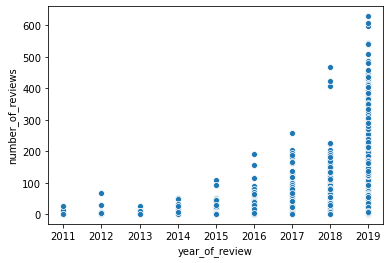

In [30]:
sns.scatterplot(y=data['number_of_reviews'],x=data['year_of_review'])

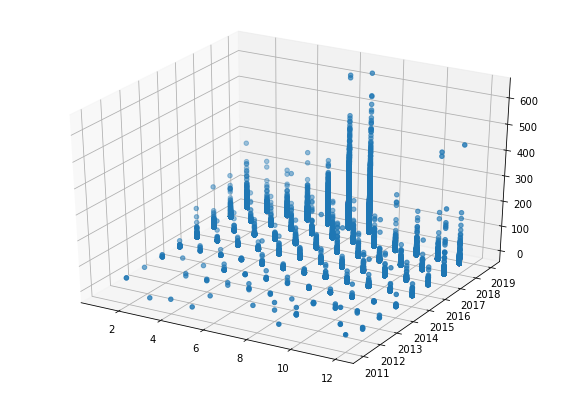

In [54]:
x=data['month_of_review']
y=data['year_of_review']
z=data['number_of_reviews']

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,cmap='virdis')

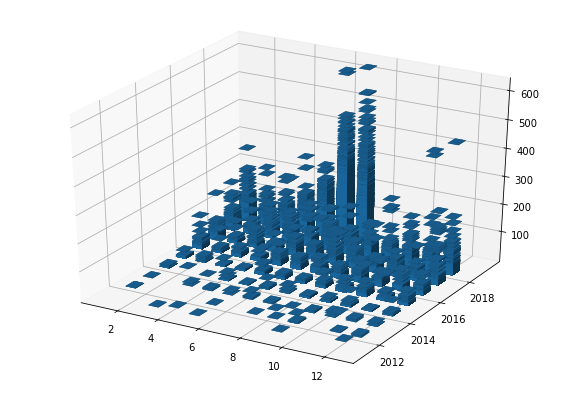

In [55]:
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.bar3d(x,y,z,0.5,0.5,1,)
plt.show()

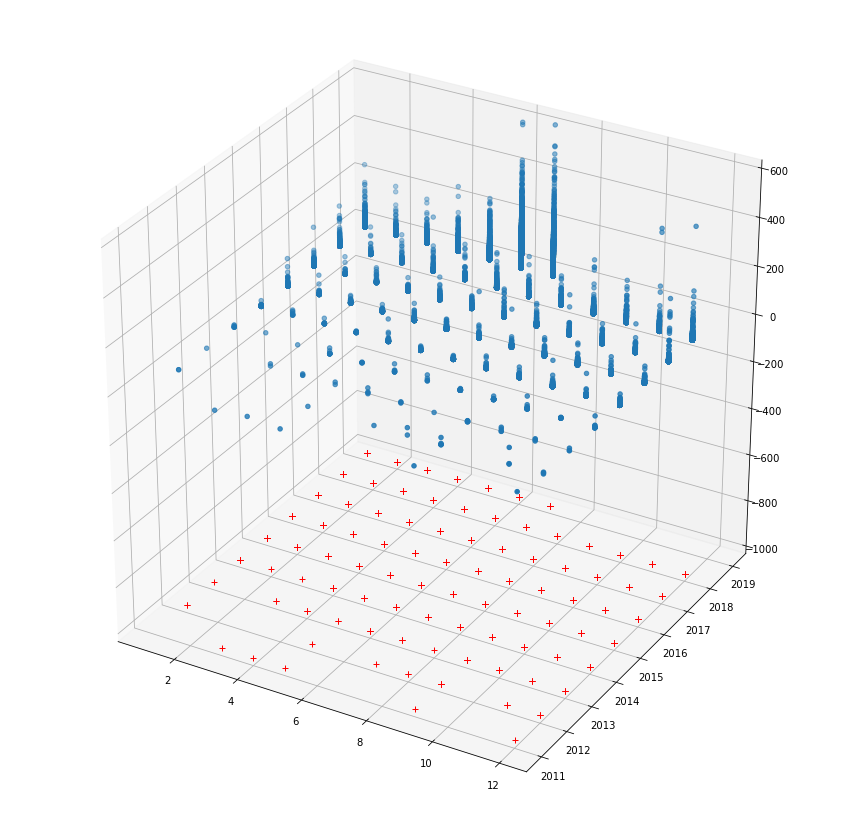

In [56]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.set_zlim([-1000,600])
#ax.plot(x,z,'r+', zdir='y', zs=1.5)
#ax.plot(y,z,'g+', zdir='x', zs=1.5)
ax.plot(x,y,'r+', zdir='z', zs=-1000)

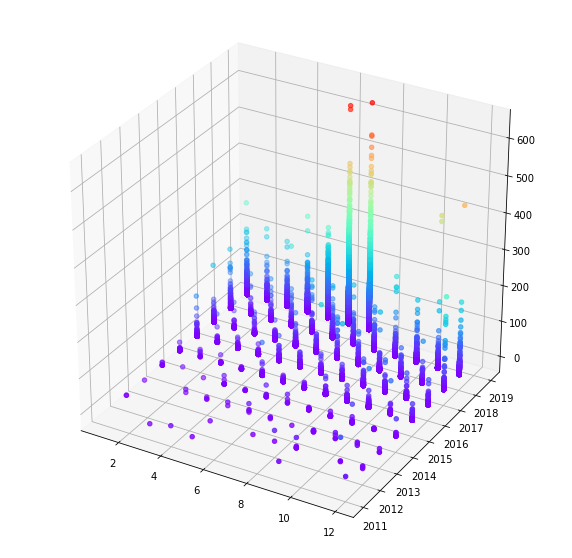

In [61]:
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
ax.scatter(x,y,z,c=z,cmap='rainbow')